# Projeto: Análise de Sentimentos em Redes Sociais
## Etapa: Análise Exploratória de Dados (EDA)
**Autor:** Vinícius Ramos  
**Fonte do Dataset:** [Kaggle](https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset)

## 1. Importação de Bibliotecas e Configurações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

warnings.filterwarnings('ignore')

# Configurações globais
pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid', palette='pastel')
plt.style.use('seaborn-v0_8-darkgrid')
fig_size = (14, 8)

## 2. Carregamento e Limpeza Inicial

In [2]:
df = pd.read_csv('../data/raw/sentimentdataset.csv')

In [3]:
# limpeza inicial do DataFrame
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
if 'Unnamed: 0.1' in df.columns:
    df = df.drop(columns=['Unnamed: 0.1'], errors='ignore')

In [4]:
# Remover espaços em branco extras
df.columns = df.columns.str.strip()
df['Sentiment'] = df['Sentiment'].str.strip()
df['Text'] = df['Text'].str.strip()
df['Platform'] = df['Platform'].str.strip()
df['Country'] = df['Country'].str.strip()

In [5]:
# Converter a coluna 'Timestamp' para o tipo datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [6]:
# Converter colunas de contagem para numérico, tratando erros e preenchendo NaN com 0
for col in ['Retweets', 'Likes']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

In [7]:
print("Dados carregados e limpos. Dimensões:", df.shape)
print(df.head())

Dados carregados e limpos. Dimensões: (732, 13)
                                          Text Sentiment           Timestamp  \
0        Enjoying a beautiful day at the park!  Positive 2023-01-15 12:30:00   
1           Traffic was terrible this morning.  Negative 2023-01-15 08:45:00   
2          Just finished an amazing workout! 💪  Positive 2023-01-15 15:45:00   
3  Excited about the upcoming weekend getaway!  Positive 2023-01-15 18:20:00   
4  Trying out a new recipe for dinner tonight.   Neutral 2023-01-15 19:55:00   

             User   Platform                                    Hashtags  \
0   User123          Twitter   #Nature #Park                               
1   CommuterX        Twitter   #Traffic #Morning                           
2   FitnessFan     Instagram   #Fitness #Workout                           
3   AdventureX      Facebook   #Travel #Adventure                          
4   ChefCook       Instagram   #Cooking #Food                              

   Retweets  L

## 4. Simplificação dos Sentimentos

In [8]:
def categorizar_sentimento(sentimento):
    sentimento_original = sentimento
    sentimento = str(sentimento).strip().lower()
    
    positivos = {'positive', 'joy', 'happiness', 'excitement', 'happy', 'contentment', 'gratitude', 'hopeful', 'elation', 'playful', 'serenity', 'pride', 'euphoria', 'love', 'amusement', 'enjoyment', 'admiration', 'affection', 'awe', 'surprise', 'acceptance', 'adoration', 'anticipation', 'calmness','enthusiasm', 'fulfillment', 'reverence', 'compassion', 'tenderness','arousal', 'empowerment', 'confidence', 'blessed', 'accomplishment','wonderment', 'optimism', 'inspired', 'grateful', 'empathetic','compassionate', 'free-spirited', 'overjoyed', 'inspiration','motivation', 'satisfaction', 'appreciation', 'relief'}
    negativos = {'negative', 'sad', 'sadness', 'despair', 'loneliness', 'bad', 'hate', 'bitterness', 'anger', 'fear', 'disgust', 'grief', 'jealousy', 'resentment', 'frustration', 'boredom', 'anxiety', 'intimidation', 'helplessness', 'envy', 'regret', 'devastated', 'dismissive', 'fearful', 'apprehensive', 'overwhelmed', 'jealous', 'envious', 'disappointed', 'shame', 'embarrassed', 'betrayal', 'heartbreak','suffering', 'isolation', 'disappointment', 'exhaustion', 'sorrow','darkness', 'desperation', 'ruins', 'desolation'}
    neutros = {'neutral', 'curiosity', 'indifference', 'confusion', 'numbness','melancholy', 'nostalgia', 'ambivalence', 'determination', 'reflection', 'contemplation', 'pensive'}
    
    if sentimento in positivos: return 'Positivo'
    if sentimento in negativos: return 'Negativo'
    if sentimento in neutros: return 'Neutro'
    
    for pos in positivos: 
        if pos in sentimento: return 'Positivo'
    for neg in negativos:
        if neg in sentimento: return 'Negativo'
    for neu in neutros:
        if neu in sentimento: return 'Neutro'
    
    return 'Neutro'

df['Sentiment_Simplified'] = df['Sentiment'].apply(categorizar_sentimento)

## 5. Análise Exploratória Visual

### 5.1 Distribuição dos Sentimentos Simplificados

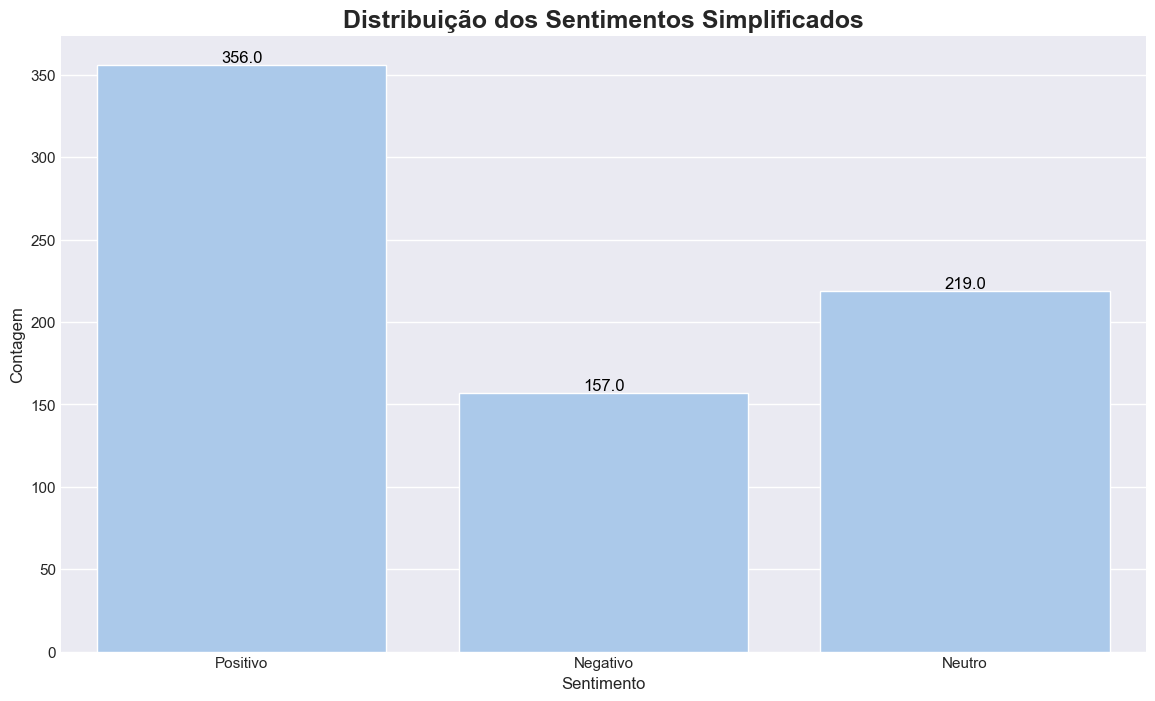

In [9]:
plt.figure(figsize=fig_size)
ax = sns.countplot(x='Sentiment_Simplified', data=df, order=['Positivo', 'Negativo', 'Neutro'])
plt.title('Distribuição dos Sentimentos Simplificados', fontsize=18, weight='bold')
plt.xlabel('Sentimento', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

### 5.2 Análise de Engajamento vs Sentimento

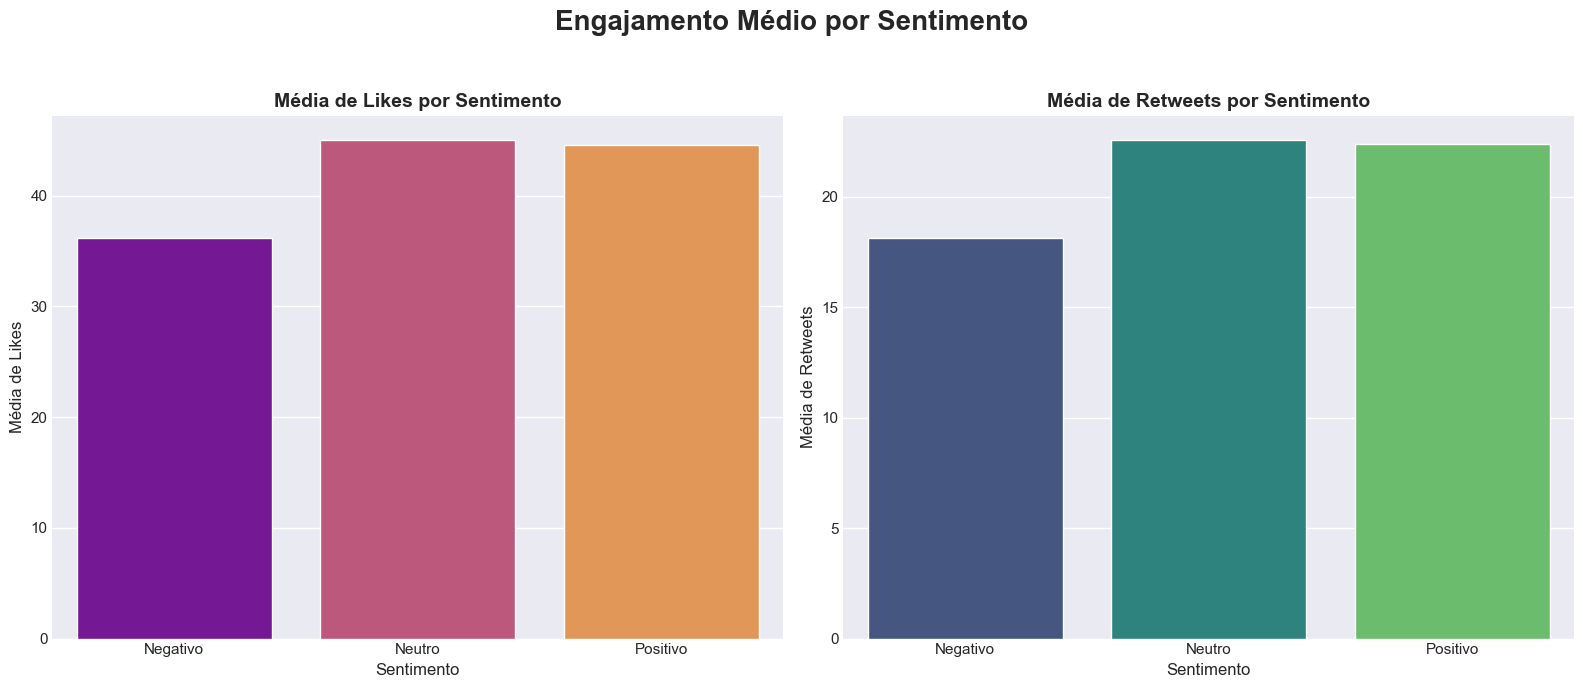

In [10]:
engagement_df = df.groupby('Sentiment_Simplified')[['Likes', 'Retweets']].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
sns.barplot(data=engagement_df, x='Sentiment_Simplified', y='Likes', ax=ax[0], palette='plasma')
ax[0].set_title('Média de Likes por Sentimento', fontsize=14, weight='bold')
ax[0].set_xlabel('Sentimento')
ax[0].set_ylabel('Média de Likes')

sns.barplot(data=engagement_df, x='Sentiment_Simplified', y='Retweets', ax=ax[1], palette='viridis')
ax[1].set_title('Média de Retweets por Sentimento', fontsize=14, weight='bold')
ax[1].set_xlabel('Sentimento')
ax[1].set_ylabel('Média de Retweets')

plt.suptitle('Engajamento Médio por Sentimento', fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### 5.3 Análise de Texto: Nuvem de Palavras por Sentimento

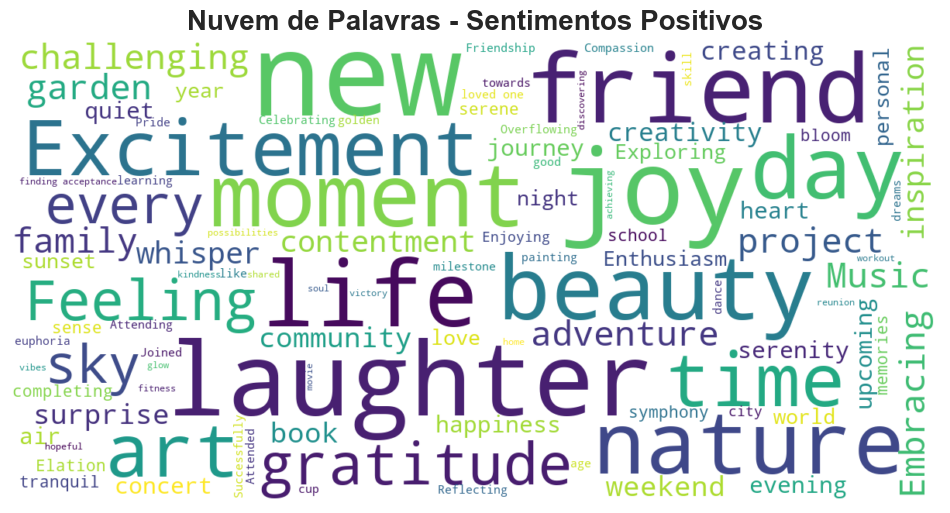

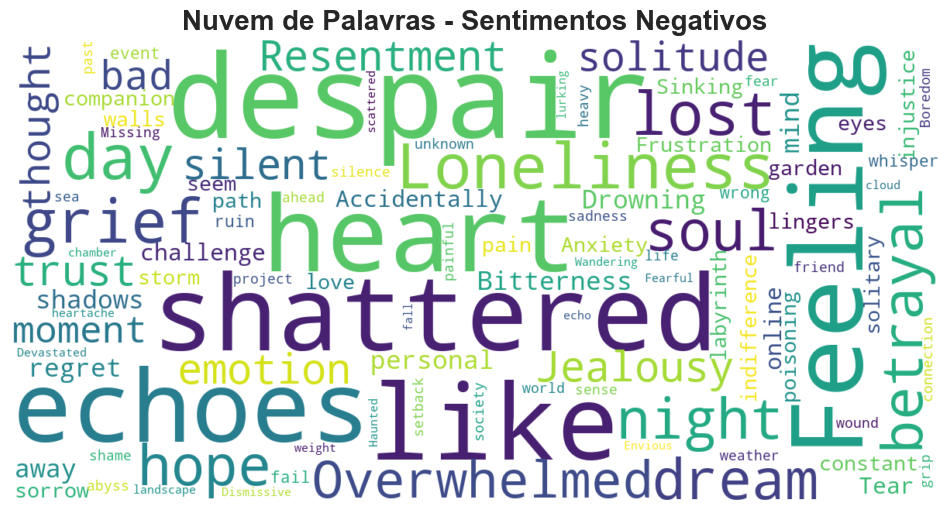

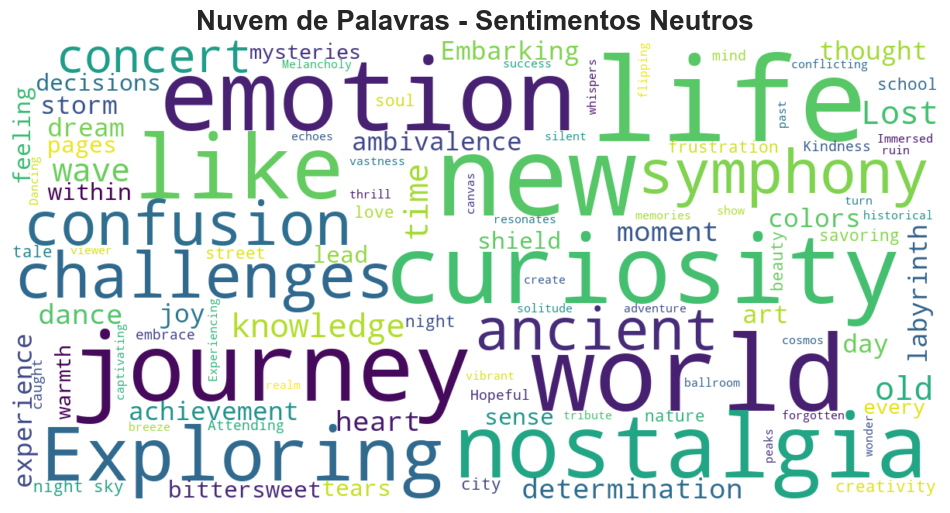

In [11]:
try:
    stopwords_list = stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
    stopwords_list = stopwords.words('english')

def show_wordcloud(data, title):
    text = ' '.join(data['Text'].astype(str).tolist())
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords_list,
        max_words=100,
        max_font_size=50,
        scale=3,
        random_state=42
    ).generate(text)
    
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20, weight='bold')
    plt.show()

show_wordcloud(df[df['Sentiment_Simplified'] == 'Positivo'], 'Nuvem de Palavras - Sentimentos Positivos')
show_wordcloud(df[df['Sentiment_Simplified'] == 'Negativo'], 'Nuvem de Palavras - Sentimentos Negativos')
show_wordcloud(df[df['Sentiment_Simplified'] == 'Neutro'], 'Nuvem de Palavras - Sentimentos Neutros')


### 5.4 Análise Temporal: Sentimentos por Hora do Dia

<Figure size 1500x800 with 0 Axes>

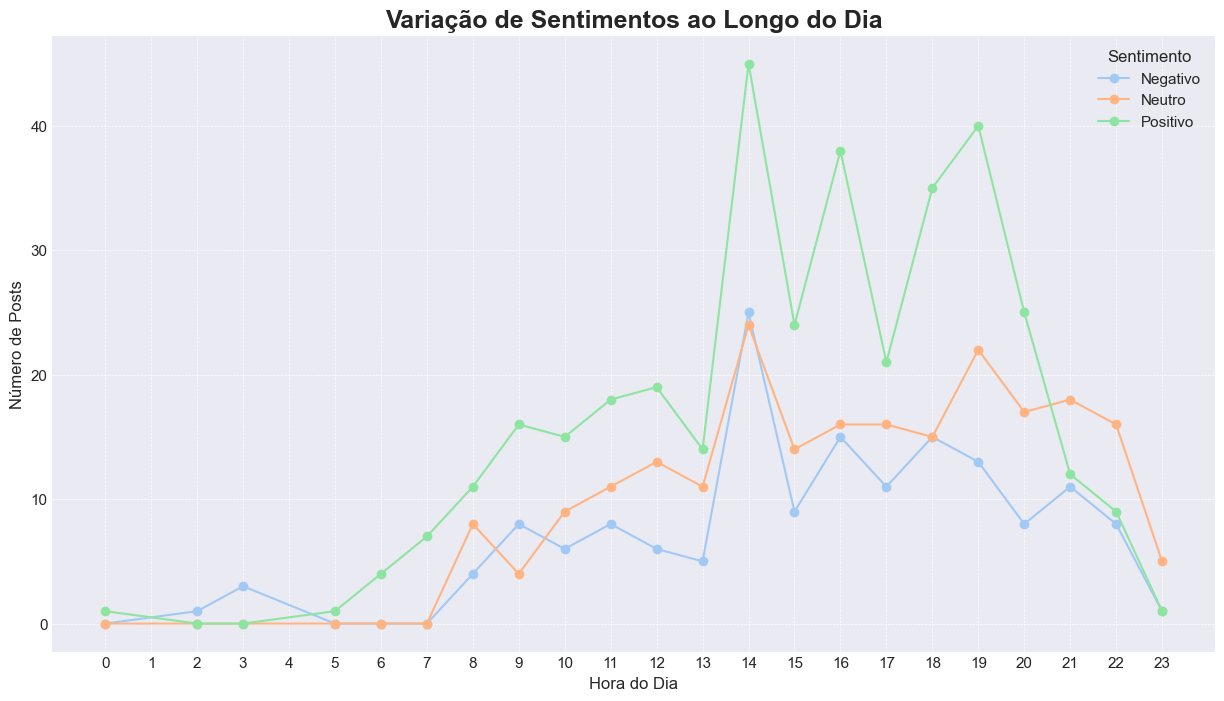

In [12]:
df['Hour'] = df['Timestamp'].dt.hour
sentiment_by_hour = df.groupby(['Hour', 'Sentiment_Simplified']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 8))
sentiment_by_hour.plot(kind='line', marker='o', figsize=(15, 8))
plt.title('Variação de Sentimentos ao Longo do Dia', fontsize=18, weight='bold')
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Número de Posts', fontsize=12)
plt.xticks(np.arange(0, 24, 1))
plt.legend(title='Sentimento')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## 6. Salvando o DataFrame Tratado

In [ ]:
df.to_csv('../data/processed/sentimentdataset_tratado.csv', index=False)